In [21]:
#importing the libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import numpy as np
plt.style.use('ggplot')
from matplotlib.pyplot import figure 
%matplotlib inline 

#change the directory
os.chdir("D:\\data science for engineers\\kaggle\\movies\\movies.csv")

#read the file 
df=pd.read_csv('movies.csv')

In [22]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [23]:
df.columns 

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [29]:
#let see any missing data 
for col in df:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [34]:
#before dropping the null values the shape of the data 
df.shape


(7668, 15)

In [35]:
#drop the null values 
df.dropna(inplace=True)
df.shape

(5421, 15)

In [36]:
#let see any missing data 
for col in df:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [38]:
#let see the data types 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [40]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [51]:
#set option for scrolling 
pd.set_option('display.max_rows',None)

In [97]:
df=df.sort_values(by=['gross'],ascending=False)

Text(0, 0.5, 'gross earnings')

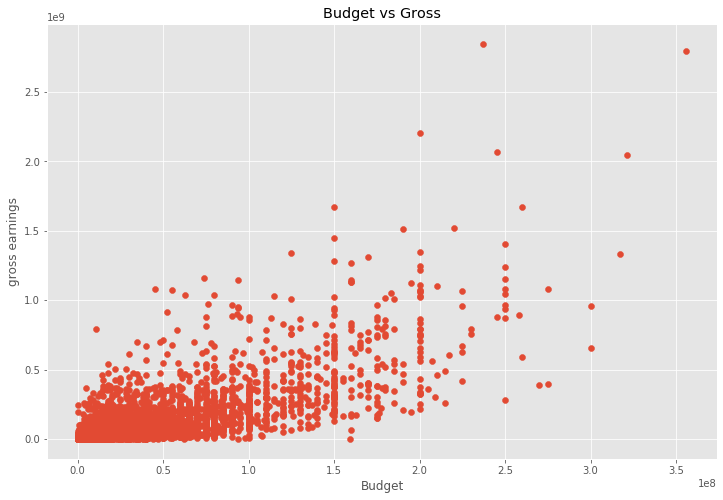

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(df.budget,df.gross)
plt.title("Budget vs Gross")
plt.xlabel("Budget")
plt.ylabel("gross earnings")

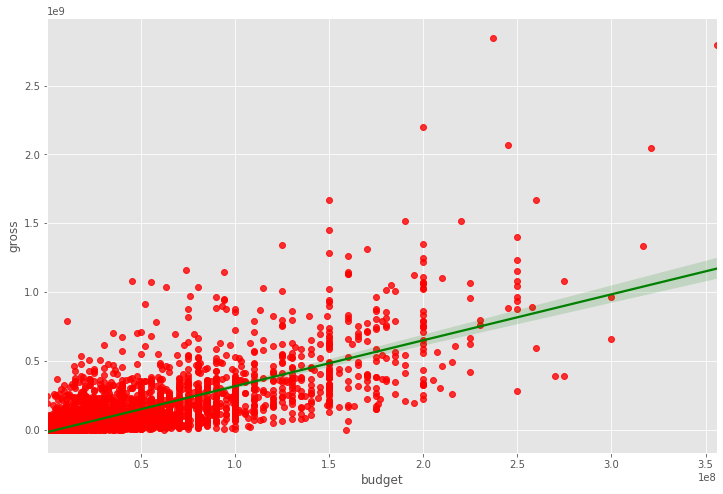

In [62]:
#lets draw it with seaborn
plt.figure(figsize=(12,8))
sns.regplot('budget','gross',df,scatter_kws={"color":"red"},line_kws={"color":"green"})

In [64]:
#lets check the correlation pearson,kendall,spearman
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


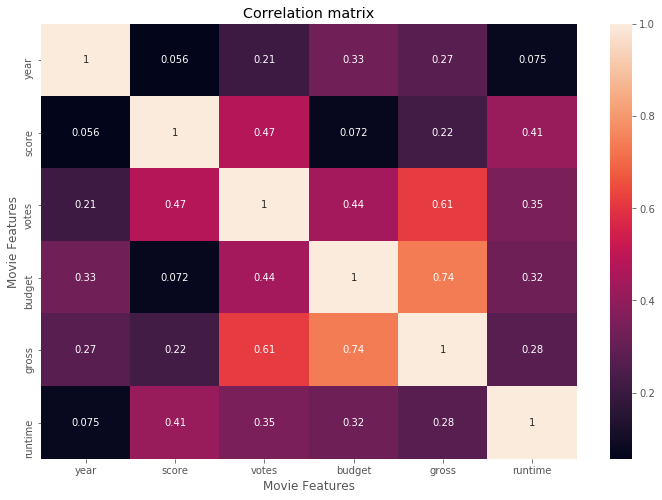

In [72]:
# lets plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [87]:
#categorise the data with code 
df_numerize = df 

for col in df_numerize.columns:
    if(df_numerize[col].dtypes=='object'):
             df_numerize[col] = df_numerize[col].astype('category')
             df_numerize[col] = df_numerize[col].cat.codes

In [98]:
df_numerize.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0


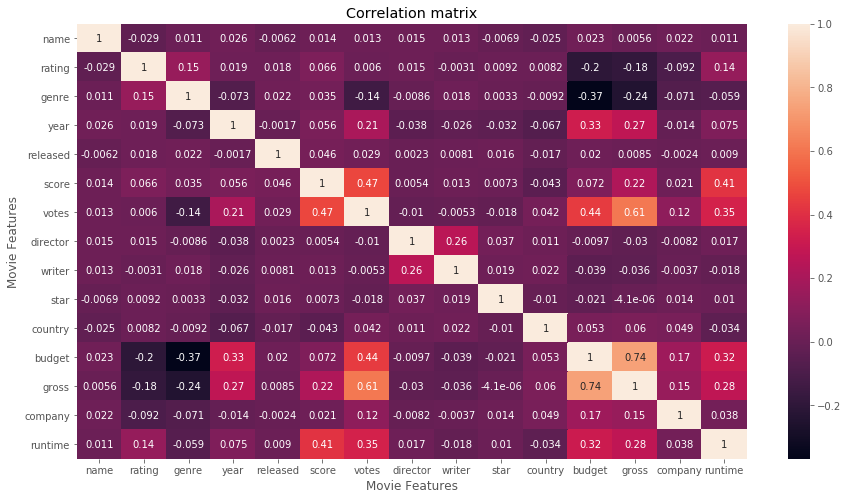

In [90]:
# lets plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df_numerize.corr(), annot=True)
plt.title("Correlation matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [92]:
corr_pairs = df_numerize.corr().unstack()

In [95]:
corr_pairs_list = corr_pairs.sort_values()

In [99]:
corr_pairs_list.tail()

year     year       1.0
genre    genre      1.0
rating   rating     1.0
company  company    1.0
runtime  runtime    1.0
dtype: float64

# from this it is concluded that the gross is highly correlated 
1. budget 
2. votes 